In [1]:
#Importing all the required libraries
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd

In [7]:
def PlotMap(data,year=None):
    # Create a figure and axis for the plot
    fig, ax = plt.subplots()

    # Create a colormap
    cmap = plt.get_cmap('BrBG')  # You can choose any other colormap you prefer

    # Determine the appropriate color limits based on your data
    vmin = 1.0  # Minimum value for the color scale
    vmax = -1.0  # Maximum value for the color scale

    # Plot the average yearly rainfall data using the colormap
    im = ax.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower',
                   extent=[data['lon'].min(), data['lon'].max(),
                           data['lat'].min(), data['lat'].max()])

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, label='Rainfall')

    # Set axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Indian Rainfall {year}')


In [3]:
#Accessing the zone files
zone1=[]
zone2=[]
zone3=[]
zone4=[]
zone5=[]
zone6=[]

#Accessing nc the datasets
path1=[]
path2=[]
path3=[]
path4=[]
path5=[]
path6=[]

#Storing the paths in a array
for i in range(1901,2011):
    path1.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 1\Zone1_Anomaly_{i}.nc")
    path2.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 2\Zone2_Anomaly_{i}.nc")
    path3.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 3\Zone3_Anomaly_{i}.nc")
    path4.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 4\Zone4_Anomaly_{i}.nc")
    path5.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 5\Zone5_Anomaly_{i}.nc")
    path6.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 6\Zone6_Anomaly_{i}.nc")
    
    
#Accessing all the datasets and storing all data in all_data list
for i in range(len(path1)):
    zone1.append(xarray.open_dataset(path1[i]))
    zone2.append(xarray.open_dataset(path2[i]))
    zone3.append(xarray.open_dataset(path3[i]))
    zone4.append(xarray.open_dataset(path4[i]))
    zone5.append(xarray.open_dataset(path5[i]))
    zone6.append(xarray.open_dataset(path6[i]))



Zone 1 mean :  <xarray.DataArray 'rain' ()>
array(4.04389591e-17)
Zone 2 mean :  <xarray.DataArray 'rain' ()>
array(1.74277573e-17)
Zone 3 mean :  <xarray.DataArray 'rain' ()>
array(5.58099022e-18)
Zone 4 mean :  <xarray.DataArray 'rain' ()>
array(-6.35564078e-19)
Zone 5 mean :  <xarray.DataArray 'rain' ()>
array(-9.27078103e-17)
Zone 6 mean :  <xarray.DataArray 'rain' ()>
array(9.72959087e-16)


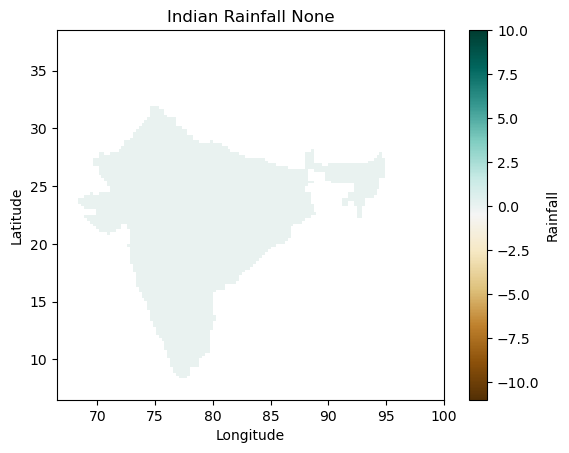

In [5]:
#Find the climatological mean i.e a mean of 
combined_data_zone1 = xarray.concat(zone1, dim='years')
mean_zone1_map = combined_data_zone1['rain'].mean(dim='years')
zone1_mean_number = mean_zone1_map.mean()

combined_data_zone2 = xarray.concat(zone2, dim='years')
mean_zone2_map = combined_data_zone2['rain'].mean(dim='years')
zone2_mean_number = mean_zone2_map.mean()

combined_data_zone3 = xarray.concat(zone3, dim='years')
mean_zone3_map = combined_data_zone3['rain'].mean(dim='years')
zone3_mean_number = mean_zone3_map.mean()

combined_data_zone4 = xarray.concat(zone4, dim='years')
mean_zone4_map = combined_data_zone4['rain'].mean(dim='years')
zone4_mean_number = mean_zone4_map.mean()

combined_data_zone5 = xarray.concat(zone5, dim='years')
mean_zone5_map = combined_data_zone5['rain'].mean(dim='years')
zone5_mean_number = mean_zone5_map.mean()

combined_data_zone6 = xarray.concat(zone6, dim='years')
mean_zone6_map = combined_data_zone6['rain'].mean(dim='years')
zone6_mean_number = mean_zone6_map.mean()


fullMap_climatological_mean=mean_zone1_map.combine_first(mean_zone2_map.combine_first(mean_zone3_map.combine_first(mean_zone4_map.combine_first(mean_zone5_map.combine_first(mean_zone6_map)))))
PlotMap(fullMap_climatological_mean)

print("Zone 1 mean : ",zone1_mean_number)
print("Zone 2 mean : ",zone2_mean_number)
print("Zone 3 mean : ",zone3_mean_number)
print("Zone 4 mean : ",zone4_mean_number)
print("Zone 5 mean : ",zone5_mean_number)
print("Zone 6 mean : ",zone6_mean_number)

Zone 1 Std :  <xarray.DataArray 'rain' ()>
array(1.66342988)
Zone 2 Std :  <xarray.DataArray 'rain' ()>
array(2.16236591)
Zone 3 Std :  <xarray.DataArray 'rain' ()>
array(1.49391045)
Zone 4 Std :  <xarray.DataArray 'rain' ()>
array(3.28296081)
Zone 5 Std :  <xarray.DataArray 'rain' ()>
array(2.00062476)
Zone 6 Std :  <xarray.DataArray 'rain' ()>
array(5.50525159)


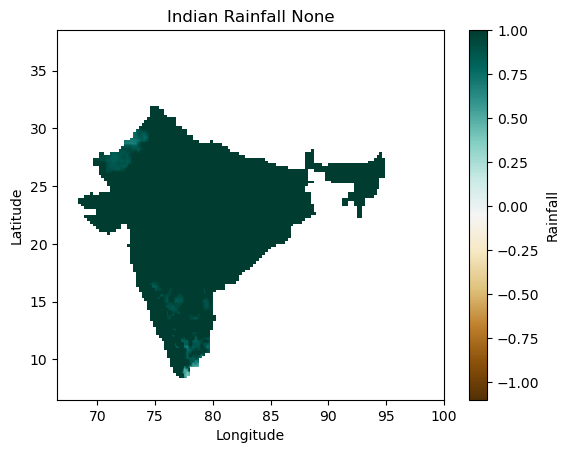

In [8]:
#Calculating the standard deviation
std_zone1_map = combined_data_zone1['rain'].std(dim='years') 
std_zone1_number=std_zone1_map.mean()

std_zone2_map = combined_data_zone2['rain'].std(dim='years') 
std_zone2_number=std_zone2_map.mean()

std_zone3_map = combined_data_zone3['rain'].std(dim='years') 
std_zone3_number=std_zone3_map.mean()

std_zone4_map = combined_data_zone4['rain'].std(dim='years') 
std_zone4_number=std_zone4_map.mean()

std_zone5_map = combined_data_zone5['rain'].std(dim='years') 
std_zone5_number=std_zone5_map.mean()

std_zone6_map = combined_data_zone6['rain'].std(dim='years') 
std_zone6_number=std_zone6_map.mean()

fullMap_climatological_std=std_zone1_map.combine_first(std_zone2_map.combine_first(std_zone3_map.combine_first(std_zone4_map.combine_first(std_zone5_map.combine_first(std_zone6_map)))))
PlotMap(fullMap_climatological_std)

print("Zone 1 Std : ",std_zone1_number)
print("Zone 2 Std : ",std_zone2_number)
print("Zone 3 Std : ",std_zone3_number)
print("Zone 4 Std : ",std_zone4_number)
print("Zone 5 Std : ",std_zone5_number)
print("Zone 6 Std : ",std_zone6_number)

In [9]:
#Accessing the zone files
zone1=[]
zone2=[]
zone3=[]
zone4=[]
zone5=[]
zone6=[]

#Accessing nc the datasets
path1=[]
path2=[]
path3=[]
path4=[]
path5=[]
path6=[]

#Storing the paths in a array
for i in range(2011,2023):
    path1.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 1\Zone1_Anomaly_{i}.nc")
    path2.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 2\Zone2_Anomaly_{i}.nc")
    path3.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 3\Zone3_Anomaly_{i}.nc")
    path4.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 4\Zone4_Anomaly_{i}.nc")
    path5.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 5\Zone5_Anomaly_{i}.nc")
    path6.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 6\Zone6_Anomaly_{i}.nc")
    
    
#Accessing all the datasets and storing all data in all_data list
for i in range(len(path1)):
    zone1.append(xarray.open_dataset(path1[i]))
    zone2.append(xarray.open_dataset(path2[i]))
    zone3.append(xarray.open_dataset(path3[i]))
    zone4.append(xarray.open_dataset(path4[i]))
    zone5.append(xarray.open_dataset(path5[i]))
    zone6.append(xarray.open_dataset(path6[i]))


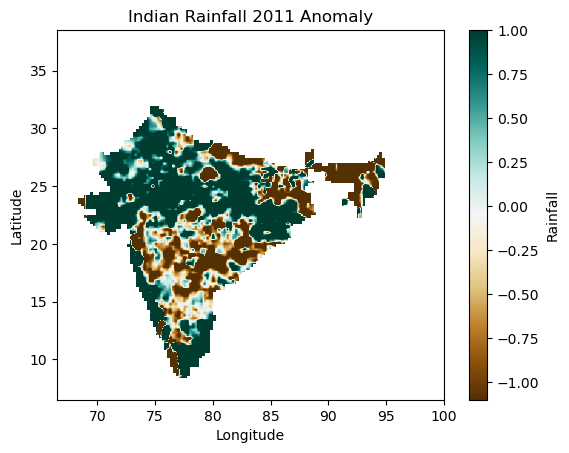

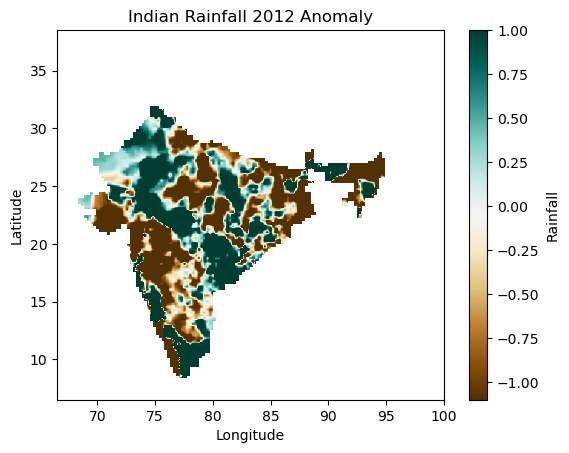

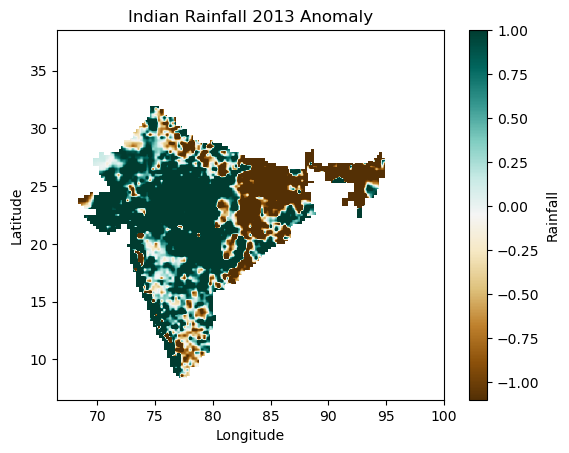

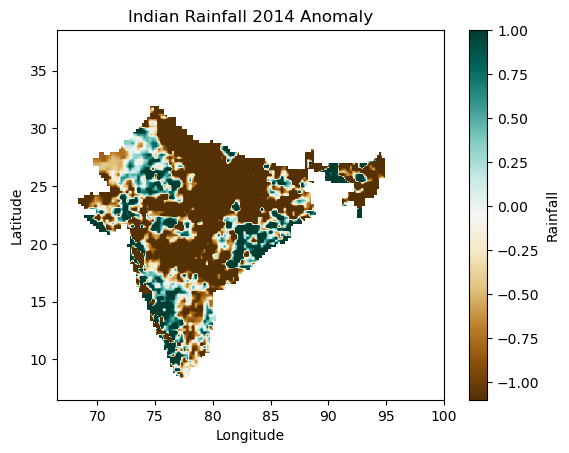

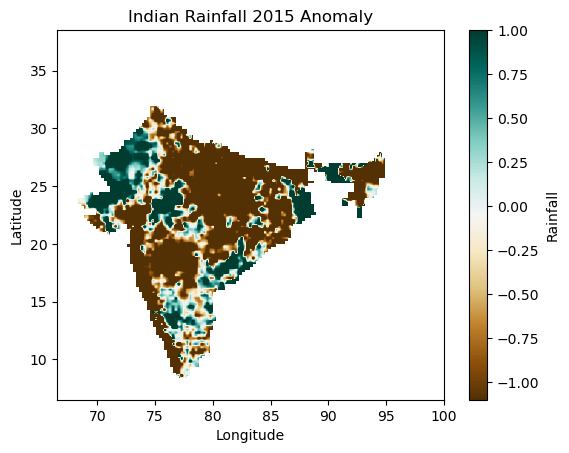

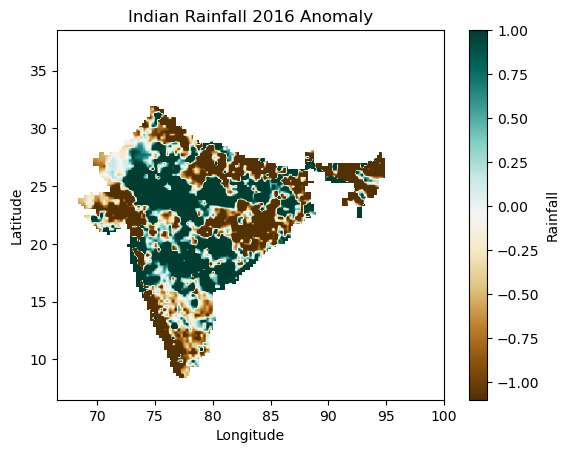

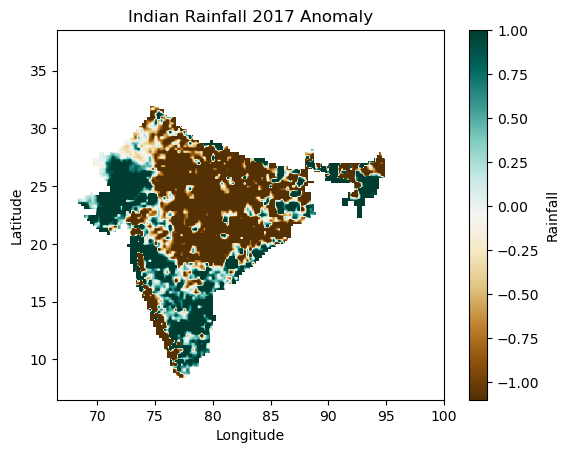

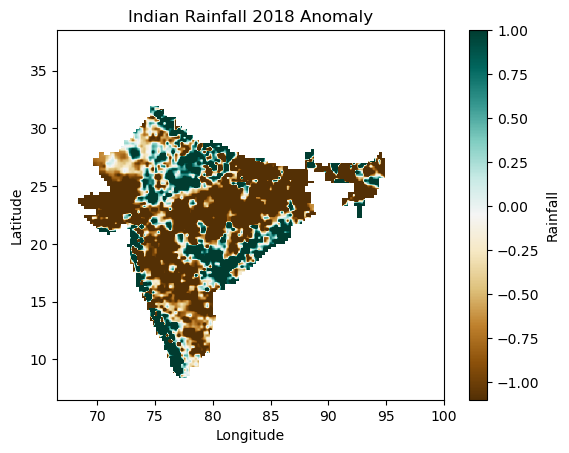

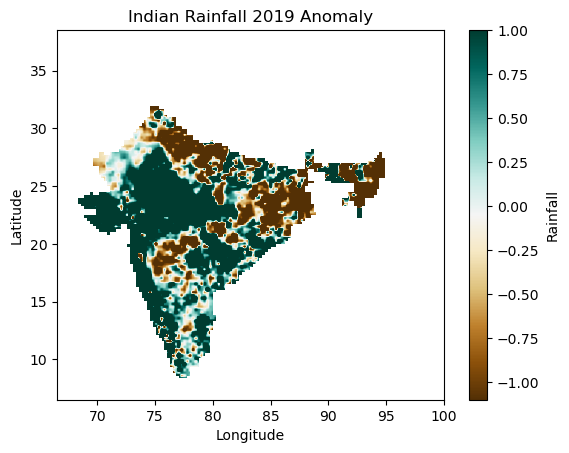

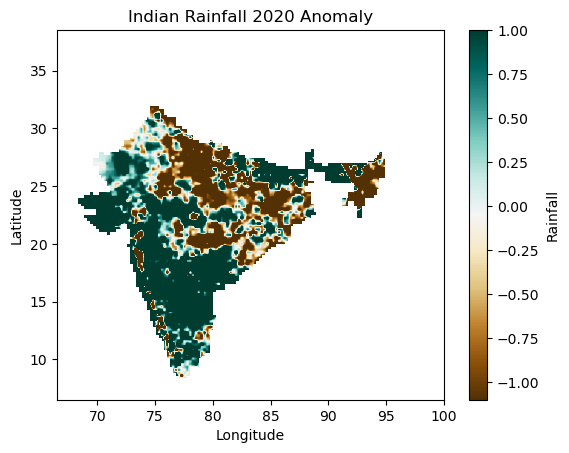

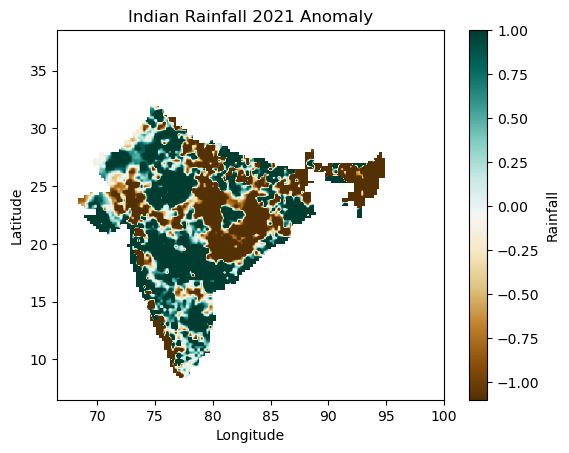

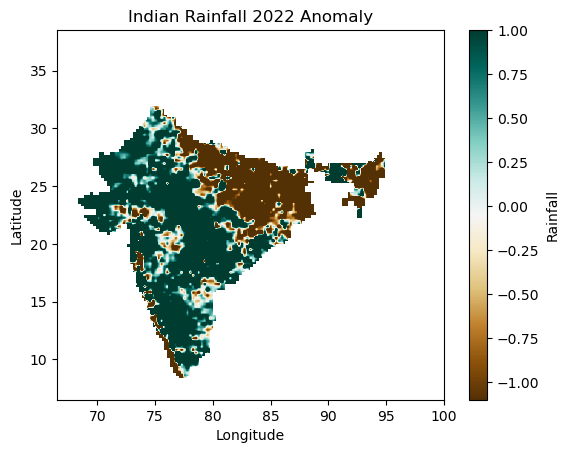

In [12]:
year=2011
for i in range(len(zone1)):
    cb=zone1[i].combine_first(zone2[i].combine_first(zone3[i].combine_first(zone4[i].combine_first(zone5[i].combine_first(zone6[i])))))
    PlotMap(cb.to_array()[0],f"{year} Anomaly")
    year+=1

In [13]:
zone1_anomaly_number=[]
zone2_anomaly_number=[]
zone3_anomaly_number=[]
zone4_anomaly_number=[]
zone5_anomaly_number=[]
zone6_anomaly_number=[]

for i in range(len(zone1)):
    zone1_anomaly_number.append(zone1[i]['rain'].mean())
    zone2_anomaly_number.append(zone2[i]['rain'].mean())
    zone3_anomaly_number.append(zone3[i]['rain'].mean())
    zone4_anomaly_number.append(zone4[i]['rain'].mean())
    zone5_anomaly_number.append(zone5[i]['rain'].mean())
    zone6_anomaly_number.append(zone6[i]['rain'].mean())

In [14]:
def getCategory(anomaly,mean,std):
    
    anomaly=float(anomaly)
    mean=float(mean)
    std=float(std)
    #print(anomaly)
    
    threshold1 = mean - 2.5*std
    threshold2 = mean - std
    threshold3 = mean - 0.5*std
    threshold4 = mean + 0.5*std
    threshold5 = mean + std
    threshold6 = mean + 2.5*std
    
   

    #Extremely low ranges of zonal mean rainfall
    if(anomaly< threshold1 ):
        return 1
    #Much lower range of zonal mean rainfall
    elif(anomaly > threshold1 and anomaly < threshold2):
        return 2
    #Slightly lower range of zonal mean rainfall
    elif(anomaly > threshold2 and anomaly < threshold3):
        return 3
    #Within nearest range of zonal mean rainfall
    elif( anomaly > threshold3 and anomaly < threshold4):
        return 4
    #Slightly higher  range of zonal mean rainfall
    elif(anomaly > threshold4 and anomaly < threshold5):
        return 5
    #Much higher range of zonal mean rainfall
    elif(anomaly > threshold5 and anomaly < threshold6):
        return 6
    #Extremely high ranges of zonal mean rainfall
    elif(anomaly > threshold6):
        return 7
    else:
        print(anomaly)

In [15]:
year_category_matrix=[]
zonal_category_matrix=[]

for i in range(len(zone1)):
    zonal_category_matrix.append(getCategory(zone1_anomaly_number[i],zone1_mean_number,std_zone1_number))
    zonal_category_matrix.append(getCategory(zone2_anomaly_number[i],zone2_mean_number,std_zone2_number))
    zonal_category_matrix.append(getCategory(zone3_anomaly_number[i],zone3_mean_number,std_zone3_number))
    zonal_category_matrix.append(getCategory(zone4_anomaly_number[i],zone4_mean_number,std_zone4_number))
    zonal_category_matrix.append(getCategory(zone5_anomaly_number[i],zone5_mean_number,std_zone5_number))
    zonal_category_matrix.append(getCategory(zone6_anomaly_number[i],zone6_mean_number,std_zone6_number))
    year_category_matrix.append(zonal_category_matrix)
    zonal_category_matrix=[]



In [16]:
year_category_matrix

[[6, 4, 5, 3, 4, 5],
 [4, 4, 5, 3, 4, 4],
 [5, 4, 4, 4, 5, 5],
 [4, 3, 4, 4, 3, 4],
 [4, 3, 4, 4, 3, 2],
 [4, 4, 4, 4, 4, 4],
 [4, 3, 4, 5, 3, 4],
 [4, 4, 4, 4, 4, 4],
 [5, 4, 5, 4, 5, 6],
 [5, 4, 6, 5, 4, 5],
 [4, 4, 4, 4, 4, 4],
 [5, 3, 5, 4, 5, 4]]

In [17]:
#Converting the cattegory matrix to a pandas dataFrame
column_labels = ['zone1', 'zone2', 'zone3', 'zone4', 'zone5', 'zone6']
df = pd.DataFrame(year_category_matrix, columns=column_labels)
df

,zone1,zone2,zone3,zone4,zone5,zone6
0,6,4,5,3,4,5
1,4,4,5,3,4,4
2,5,4,4,4,5,5
3,4,3,4,4,3,4
4,4,3,4,4,3,2
5,4,4,4,4,4,4
6,4,3,4,5,3,4
7,4,4,4,4,4,4
8,5,4,5,4,5,6
9,5,4,6,5,4,5


In [18]:
# #Storing the dataFrame
# df.to_csv('Rain Category 2011-2023.csv')